In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


The [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/index.html) package provides classes for representing a variety of celestial/spatial coordinates and their velocity components, as well as tools for converting between common coordinate systems in a uniform way.


In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord

# define a `Skycoord` using RA and DEC **with units**
c1 = SkyCoord(ra=8.6252*u.degree, dec=-41.27321*u.degree, frame='icrs')
print ("c1 with no args       :",c1.to_string())
print ("c1 in hmsdms          :",c1.to_string('hmsdms'))

# resolving names (using Sesame)
c2=SkyCoord.from_name("M32")
print ("c2 in hmsdms with ':' :",c2.to_string('hmsdms',sep=":",precision=1))
print ("RA of c2 in radians   :",c2.ra.radian)

c2_lb=c2.transform_to('galactic')
print ("Galactic l,b of c2    :",c2_lb.to_string())

print ("RA,DEC {} {}".format(c2.ra.to_string(sep=":",precision=2,unit=u.hour),
                             c2.dec.to_string(sep=":",precision=3)
                            ))


c1 with no args       : 8.6252 -41.2732
c1 in hmsdms          : 00h34m30.048s -41d16m23.556s
c2 in hmsdms with ':' : 00:42:41.8 +40:51:54.6
RA of c2 in radians   : 0.18630117070948915
Galactic l,b of c2    : 121.15 -21.9763
RA,DEC 0:42:41.82 40:51:54.610


These are just some examples. Skycoords can be defined in many ways, using different formats. Read the documentations!

It accepts also numpy arrays.

The file `wings.dat` is a list of coordinates of galaxie clusters, the RA and DEC in h:m:s d:m:s are on the 2nd and 3rd columns. 
Let's define a list of coordinate and plot them in an aitoff projection.

Because matplotlib needs the coordinates in radians and between $−\pi$ and $\pi$, not 0 and $2\pi$, we have to convert them. For this purpose the `astropy.coordinates.Angle` object provides a special method, which we use here to wrap at 180:

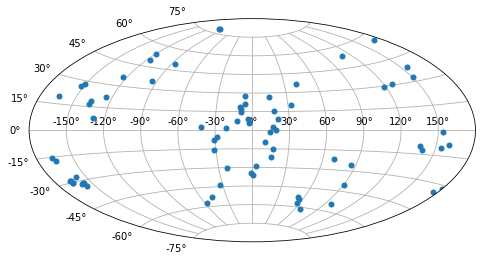

In [3]:
from astropy.io import ascii
tab=ascii.read('wings.dat',format="commented_header")
coo=SkyCoord(ra=tab["RA"],dec=tab["DEC"],unit=(u.hourangle, u.deg))

ra_rad = coo.ra.wrap_at(180 * u.deg).radian
dec_rad=coo.dec.radian
fig=plt.figure(figsize=(8,4.2))
ax=fig.add_subplot(111, projection="aitoff")
ax.grid(True)
ax.plot(ra_rad, dec_rad, 'o', markersize=5);

## convert coordinates from equatorial to Altitude-Azimuth system
we want to know which of these clusters can be observed from the Asiago Observatory at a given date


Import the packages necessary for finding coordinates and making coordinate transformations.

Use [astropy.coordinates.EarthLocation](http://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html#astropy.coordinates.EarthLocation)
to provide the location of Cima Ekar (Asiago) observaory and set the time to UTC 23:00:00 on 2018 May 22:

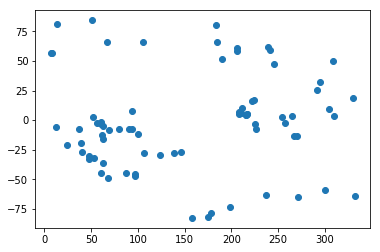

In [4]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
asiago=EarthLocation.of_site('ekar')
time = Time('2018-05-22 23:00:00')

altaz = coo.transform_to(AltAz(obstime=time,location=asiago))


fig,ax=plt.subplots()
ax.plot(altaz.az,altaz.alt,'o');

much more on this on this astropy example: [Determining and plotting the altitude/azimuth of a celestial object](http://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html)
